## Students Performance in Exams
### 사용 데이터
- [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)
- Data Description
  - gender
  - race/ethnicity
  - parental level of education
  - lunch
  - test preparation course
  - math score
  - reading score
  - writing score

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

raw_data = pd.read_csv("./StudentsPerformance.csv")
data = raw_data.copy()
print(data.shape)

(1000, 8)


In [2]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [3]:
data.duplicated().sum()

0

In [4]:
# data.sample(10)
data.sample(frac=0.01)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
214,male,group E,high school,standard,completed,87,91,81
845,male,group E,master's degree,standard,none,90,85,84
387,female,group C,associate's degree,free/reduced,none,57,78,67
789,female,group C,master's degree,free/reduced,none,52,65,61
334,female,group C,bachelor's degree,standard,none,83,93,95
952,female,group E,some high school,free/reduced,none,74,74,72
909,male,group E,bachelor's degree,standard,completed,70,64,70
160,male,group B,associate's degree,free/reduced,completed,82,78,74
816,female,group A,bachelor's degree,standard,none,45,59,64
599,female,group D,some high school,standard,none,65,82,81


In [5]:
# data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
for i in range(data.shape[1]):
  print(f'{data.columns[i]}: {data.loc[:,data.columns[i]].unique()}')

gender: ['female' 'male']
race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test preparation course: ['none' 'completed']
math score: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading score: [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing score: [ 74  88  93  44  75 

<AxesSubplot:>

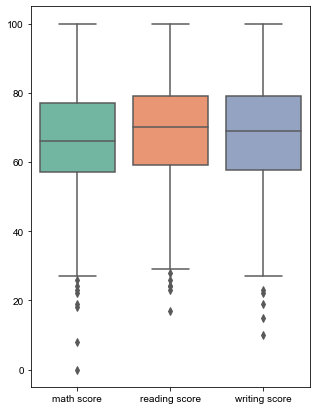

In [7]:
fig, ax = plt.subplots(figsize = (5,7))
sns.set_theme(style="whitegrid")
sns.boxplot(data=data, orient="y", palette="Set2")

In [8]:
q3 = data.quantile(0.75)
q1 = data.quantile(0.25)

iqr = q3 - q1
iqr

math score       20.00
reading score    20.00
writing score    21.25
dtype: float64

In [9]:
def is_outlier(column_name):
  iqr_range = 1.5
  outlier_detection = lambda x: True if x > q3[column_name] + iqr_range*iqr[column_name] or \
    x < q1[column_name] - iqr_range*iqr[column_name] else False
  return data[column_name].apply(outlier_detection)

math_check = is_outlier('math score')
reading_check = is_outlier('reading score')
writing_check = is_outlier('writing score')


In [10]:
total_check = np.concatenate([[math_check], [reading_check], [writing_check]], axis=0)
total_check = total_check.T
total_check.shape

(1000, 3)

In [11]:
# 아웃라이어 데이터 체크
data.loc[map(lambda x : True if x.any() else False, total_check)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
145,female,group C,some college,free/reduced,none,22,39,33
211,male,group C,some college,free/reduced,none,35,28,27
327,male,group A,some college,free/reduced,none,28,23,19
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
596,male,group B,high school,free/reduced,none,30,24,15
787,female,group B,some college,standard,none,19,38,32


In [12]:
data_trim = data.loc[map(lambda x : True if not x.any() else False, total_check)]
data_trim.reset_index(drop=True, inplace=True)
data_trim

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
983,female,group E,master's degree,standard,completed,88,99,95
984,male,group C,high school,free/reduced,none,62,55,55
985,female,group C,high school,free/reduced,completed,59,71,65
986,female,group D,some college,standard,completed,68,78,77


In [13]:
data_trim.describe()

,math score,reading score,writing score
count,988.000000,988.000000,988.000000
mean,66.625506,69.640688,68.566802
std,14.409394,14.016760,14.525267
min,27.000000,29.000000,27.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [16]:
subject_name = data_trim.columns[-3:]
subject_name

Index(['math score', 'reading score', 'writing score'], dtype='object')

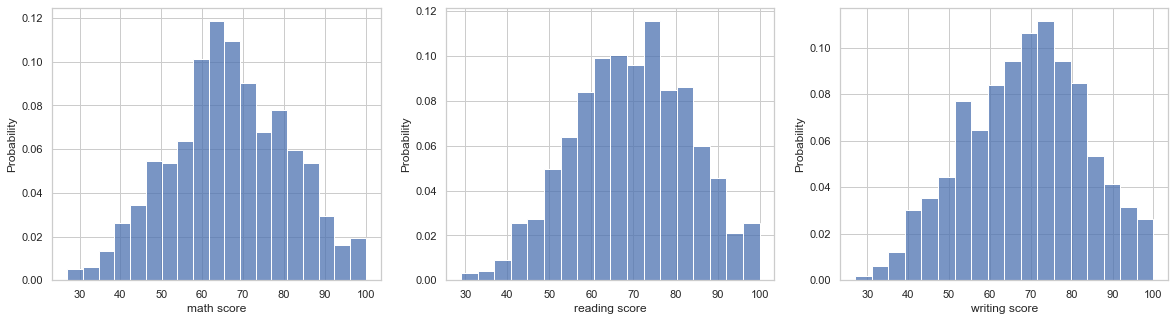

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
for i in range(len(subject_name)):
  sns.histplot(data=data_trim, x=subject_name[i], stat = "probability", ax=ax[i])

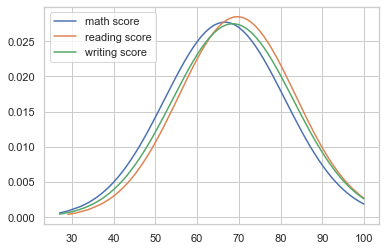

In [18]:
from scipy import stats
subject_name = data_trim.columns[-3:]

for i in range(len(subject_name)):
  sub = subject_name[i]
  data_trim_mean = np.mean(data_trim[sub])  
  data_trim_std = np.std(data_trim[sub])  
  cv1_pdf = stats.norm.pdf(data_trim[sub].sort_values(), loc=data_trim_mean, scale=data_trim_std)
  plt.plot(data_trim[sub].sort_values(), cv1_pdf, label=sub)
  plt.legend()

In [56]:
stats.levene(data_trim['reading score'], data_trim['writing score'])

LeveneResult(statistic=1.0546845877222482, pvalue=0.3045564692359549)

In [32]:
stats.ttest_rel(data_trim['reading score'], data_trim['writing score'])

Ttest_relResult(statistic=7.480374154343835, pvalue=1.6357011784200183e-13)

paired t-test를 해보았을 때, 읽기 점수와 쓰기 점수 간에 차이가 있다고 한다.  
그래프를 보았을 때는 없어보인다. 정규성 검정을 하지 않아서 생기는 문제일 수도 있다.

In [55]:
# 0.05 보다 작으면 정규성 만족 X
print('reading \n statistic: {result[0]} \n p-value {result[1]}'.format(result = stats.shapiro(data_trim['reading score'])))
print('writing \n statistic: {result[0]} \n p-value {result[1]}'.format(result = stats.shapiro(data_trim['writing score'])))

reading 
 statistic: 0.9943972229957581 
 p-value 0.0009765107533894479
writing 
 statistic: 0.9930988550186157 
 p-value 0.00015123761841095984


In [35]:
# 정규성 가정을 만족하지 않으므로 Mann–Whitney U test로 재분석한다.
stats.mannwhitneyu(data_trim['reading score'], data_trim['writing score'])

MannwhitneyuResult(statistic=507293.0, pvalue=0.12952348679091782)

읽기 점수와 쓰기 점수 간 유의미한 차이는 관찰되지 않는다.   
이번에는 점수들 간의 상관관계를 살펴보자.

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

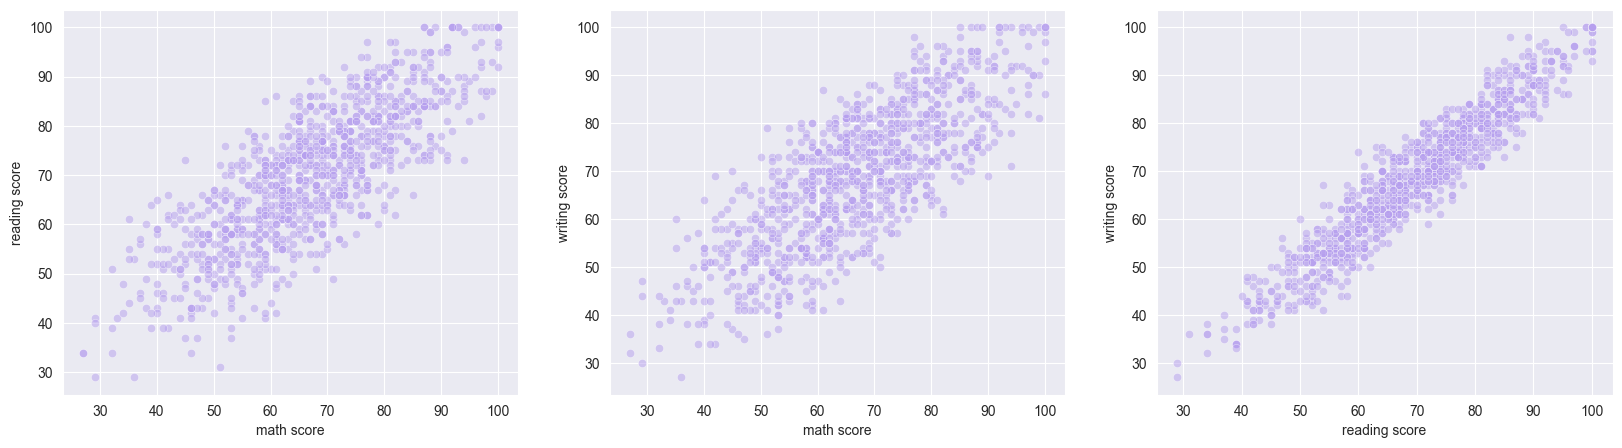

In [105]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.scatterplot(data=data_trim, x='math score', y='reading score', color='#B69FEE', alpha=0.5, ax=ax[0])
sns.scatterplot(data=data_trim, x='math score', y='writing score', color='#B69FEE', alpha=0.5, ax=ax[1])
sns.scatterplot(data=data_trim, x='reading score', y='writing score', color='#B69FEE', alpha=0.5, ax=ax[2])

In [58]:
data_trim.corr(method='pearson')

,math score,reading score,writing score
math score,1.000000,0.801405,0.783349
reading score,0.801405,1.000000,0.950629
writing score,0.783349,0.950629,1.000000


세 과목 간의 상관이 높다.   
하나를 잘하면 다른 과목도 잘하는 경향이 있는 것으로 보인다.   
이와 관련하여 부모 학력이 미치는 영향을 추후 알아보고자 한다.

In [110]:
# levene test
print('math-reading \n statistic: {result[0]} \n p-value {result[1]}'.format(result = stats.levene(data_trim['math score'], data_trim['reading score'])))
print('math-writing \n statistic: {result[0]} \n p-value {result[1]}'.format(result = stats.levene(data_trim['math score'], data_trim['writing score'])))

math-reading 
 statistic: 0.3186777263345346 
 p-value 0.5724675059839113
math-writing 
 statistic: 0.20258250633372804 
 p-value 0.6526937696261298


In [109]:
# math score - shapiro-wilk test
print('math \n statistic: {result[0]} \n p-value {result[1]}'.format(result = stats.shapiro(data_trim['math score'])))

math 
 statistic: 0.9960000514984131 
 p-value 0.011811562813818455


In [118]:
# Mann–Whitney U test
print('math-reading \n statistic: {result[0]} \n p-value {result[1]}'.format(result = stats.mannwhitneyu(data_trim['math score'], data_trim['reading score'], alternative='less')))
print('math-writing \n statistic: {result[0]} \n p-value {result[1]}'.format(result = stats.mannwhitneyu(data_trim['math score'], data_trim['writing score'], alternative='less')))

math-reading 
 statistic: 429692.0 
 p-value 2.0667982392432928e-06
math-writing 
 statistic: 449346.5 
 p-value 0.0011278084602097279


그래도 수학 과목을 다른 두 과목보다 어려워하는 경향이 있는 것 같다.   
일반적으로 수학/읽기는 성별에 따라 달라질 수 있다고 하므로 성별에 따른 추가분석도 해보고자 한다.